In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
df_train = pd.read_csv('data/8_sentences_train.csv',sep='|',index_col=0)
#df_test = pd.read_csv('data/5_sentences_test.csv',sep='|',index_col=0)

/Users/rubenstern/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df_train_pos = df_train[df_train['label']==1]
df_train_neg = df_train[df_train['label']==0].sample(n = df_train_pos.shape[0])

df_array = [df_train_pos,df_train_neg]
df_train_balanced = pd.concat(df_array)
df_train_balanced = df_train_balanced.sample(frac=1)
df_train_balanced = df_train_balanced.fillna("")

In [4]:
df_train_balanced.columnsumns

Index(['prev8', 'prev7', 'prev6', 'prev5', 'prev4', 'prev3', 'prev2', 'prev1',
       'sentence', 'label'],
      dtype='object')

In [5]:
all_sentences = df_train_balanced['sentence'] + ' ' + \
                df_train_balanced['prev1'] + ' ' + \
                df_train_balanced['prev2'] + ' ' + \
                df_train_balanced['prev3'] + ' ' + \
                df_train_balanced['prev4'] + ' ' + \
                df_train_balanced['prev5'] + ' ' + \
                df_train_balanced['prev6'] + ' ' + \
                df_train_balanced['prev7'] + ' ' + \
                df_train_balanced['prev8']

In [6]:
vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
vectorizer.fit(all_sentences.values.astype('U'))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [7]:
X_sentence = vectorizer.transform(df_train_balanced['sentence'].values.astype('U'))
X_prev1 = vectorizer.transform(df_train_balanced['prev1'].values.astype('U'))
X_prev2 = vectorizer.transform(df_train_balanced['prev2'].values.astype('U'))
X_prev3 = vectorizer.transform(df_train_balanced['prev3'].values.astype('U'))
X_prev4 = vectorizer.transform(df_train_balanced['prev4'].values.astype('U'))
X_prev5 = vectorizer.transform(df_train_balanced['prev5'].values.astype('U'))
X_prev6 = vectorizer.transform(df_train_balanced['prev6'].values.astype('U'))
X_prev7 = vectorizer.transform(df_train_balanced['prev7'].values.astype('U'))
X_prev8 = vectorizer.transform(df_train_balanced['prev8'].values.astype('U'))

list_sentence = [X_sentence,X_prev1,X_prev2,X_prev3,X_prev4,X_prev5,X_prev6,X_prev7,X_prev8]

In [12]:
accuracy_array = np.zeros(9)
for i in range(9):
    if i>0:
        X = hstack(list_sentence[:i])
    else:
        X = list_sentence[0]
    y = df_train_balanced['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_test_predict = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_predict)
    print('i: ',i,'  accuracy: ',accuracy)
    accuracy_array[i] = accuracy

i:  0   accuracy:  0.6797993581
i:  1   accuracy:  0.678165779409
i:  2   accuracy:  0.685026809909
i:  3   accuracy:  0.7005938539
i:  4   accuracy:  0.721849595449
i:  5   accuracy:  0.736724770819
i:  6   accuracy:  0.751907443353
i:  7   accuracy:  0.760882516864
i:  8   accuracy:  0.770895393308


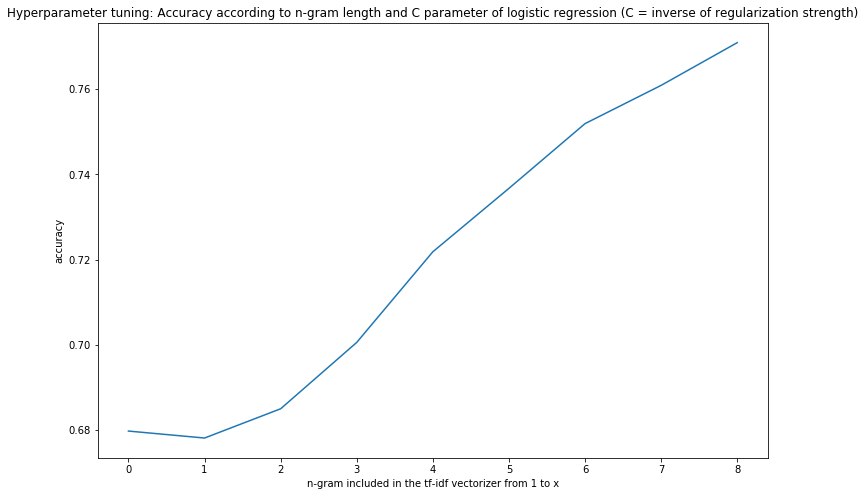

In [13]:
plt.figure(figsize=(12,8))
plt.plot(range(9), accuracy_array)
plt.title('Hyperparameter tuning: Accuracy according to n-gram length and C parameter of logistic regression (C = inverse of regularization strength)')
plt.xlabel('n-gram included in the tf-idf vectorizer from 1 to x')
plt.ylabel('accuracy')
plt.show()